# Imports

In [19]:
# import a library
import pandas

# import a library with an alias
import pandas as pd

# import a module from a package
from matplotlib import pyplot as plt

# Visualize missing values (optional)
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Read the CSV file
df = pd.read_csv("data/us-shareprices-daily.csv", delimiter=";")  # Replace with your actual file path



In [15]:
# Example transformations:
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]  # Normalize column names

In [16]:
df['date'] = pd.to_datetime(df['date'])  # Convert date columns

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5766996 entries, 0 to 5766995
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ticker              object        
 1   simfinid            int64         
 2   date                datetime64[ns]
 3   open                float64       
 4   high                float64       
 5   low                 float64       
 6   close               float64       
 7   adj._close          float64       
 8   volume              int64         
 9   dividend            float64       
 10  shares_outstanding  float64       
dtypes: datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 484.0+ MB


In [11]:
# Display first few rows
df.head()

,ticker,simfinid,date,open,high,low,close,adj._close,volume,dividend,shares_outstanding
0,A,45846,2019-03-27,80.50,80.77,78.89,79.00,75.72,1446133,NaN,317515869.0
1,A,45846,2019-03-28,79.39,79.79,78.71,79.70,76.39,1615615,NaN,317515869.0
2,A,45846,2019-03-29,80.16,80.67,79.95,80.38,77.04,1585137,NaN,317515869.0
3,A,45846,2019-04-01,80.96,81.77,80.96,81.56,78.33,1522681,0.16,317515869.0
4,A,45846,2019-04-02,81.71,81.76,81.03,81.14,77.93,1203037,NaN,317515869.0


Checking for nulls

ticker                      0
simfinid                    0
date                        0
open                        0
high                        0
low                         0
close                       0
adj._close                  0
volume                      0
dividend              5732034
shares_outstanding     516269
dtype: int64


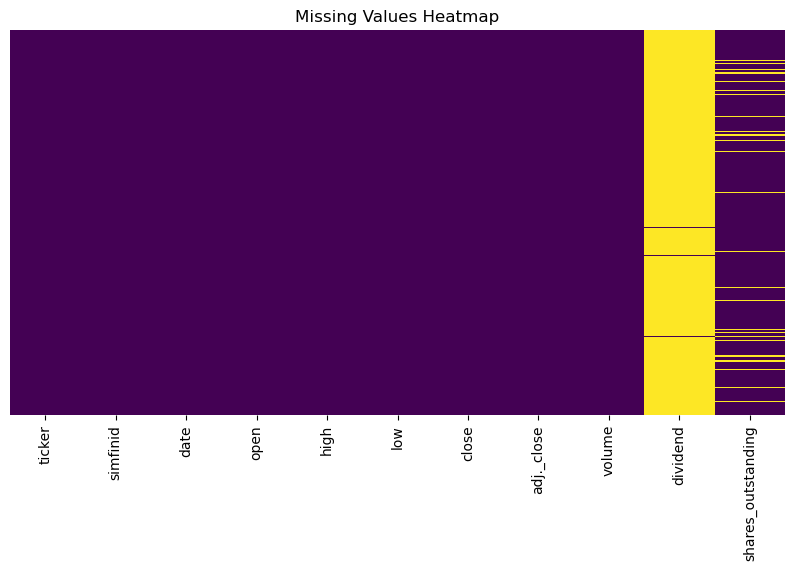

In [20]:
# Check for missing values
print(df.isnull().sum())  # Count of nulls per column

# Visualize missing values (optional)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


In [24]:
# Calculate percentage of missing values per column
null_percentage = (df.isnull().sum() / len(df)) * 100

# Display the result
print(null_percentage)


ticker                 0.000000
simfinid               0.000000
date                   0.000000
open                   0.000000
high                   0.000000
low                    0.000000
close                  0.000000
adj._close             0.000000
volume                 0.000000
dividend              99.393757
shares_outstanding     8.952130
dtype: float64


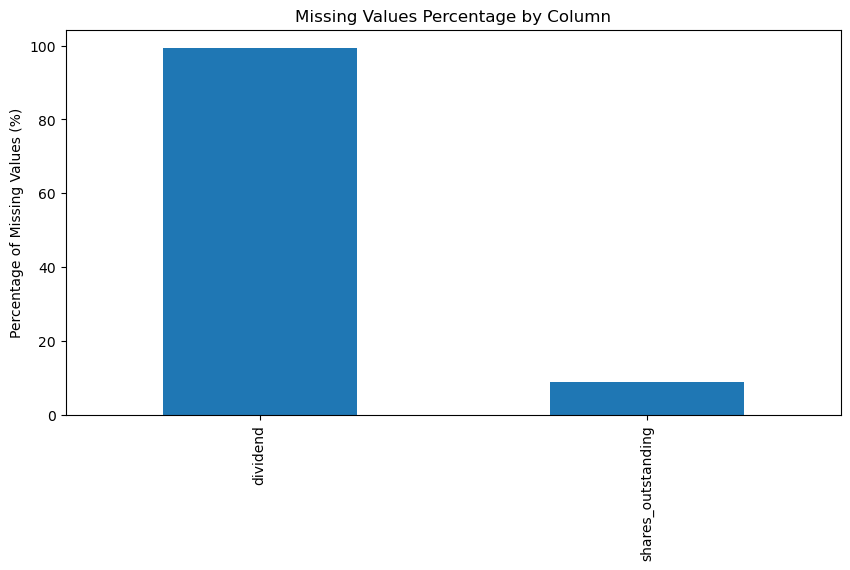

In [25]:
import matplotlib.pyplot as plt

# Plot missing values percentage
null_percentage[null_percentage > 0].plot(kind="bar", figsize=(10,5))
plt.ylabel("Percentage of Missing Values (%)")
plt.title("Missing Values Percentage by Column")
plt.show()


Lets Drop divident its 99% nulls

In [26]:
df.drop(columns=["dividend"], inplace=True)


outliers


In [32]:
import pandas as pd

# Select numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate Q1, Q3, and IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Find outliers
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR)))
print(outliers.sum())  # Number of outliers per column


simfinid                   0
open                  589131
high                  589004
low                   588694
close                 589021
adj._close            601215
volume                695821
shares_outstanding    610059
dtype: int64


In [43]:
# Installation: pip install simfin
# import simfin package
import simfin as sf

# Set your API-key for downloading data.
sf.set_api_key('344dd533-861f-4bef-9f52-be02f0276014')

# Set the local directory where data-files are stored.
# The directory will be created if it does not already exist.
sf.set_data_dir('~/simfin_data/')

# Download the data from the SimFin server and load into a Pandas DataFrame.
df = sf.load_shareprices(variant='daily')

# Print the first rows of the data.
print(df.head())

ModuleNotFoundError: No module named 'simfin'